In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import platform
from datetime import datetime,timedelta
import numpy as np
from wordcloud import WordCloud
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
import plotly.express as px


# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'


# Warning 제거
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
warnings.simplefilter(action='ignore', category=UserWarning)  
pd.set_option('mode.chained_assignment',  None)   
#pd.set_option('mode.chained_assignment', 'warn')

In [3]:
# 판다스 출력 default 60 20
pd.options.display.max_rows = 60
pd.options.display.max_columns = 30

In [4]:
camping = pd.DataFrame()

years = ['2020','2021','2022']
month = ['01','02','03','04','05','06','07','08','09','10','11','12']
for year in years:
    try:
        for j in month:
            df = pd.read_excel(f'C:/Users/kjk42/Documents/python/Done/data/data_lab/{year}{j}.xlsx')
            df['date'] = year+j
            df = df[df['소분류 카테고리'] =='캠핑']
            camping = pd.concat([camping,df])
    except:
        pass
    
df = pd.read_excel(f'C:/Users/kjk42/Documents/python/Done/data/data_lab/201911.xlsx')
df['date'] = '201911'
df = df[df['소분류 카테고리'] =='캠핑']
camping = pd.concat([camping,df])

df = pd.read_excel(f'C:/Users/kjk42/Documents/python/Done/data/data_lab/201912.xlsx')
df['date'] = '201912'
df = df[df['소분류 카테고리'] =='캠핑']
camping = pd.concat([camping,df])

camping = camping.drop(labels=['순위','중분류 카테고리','소분류 카테고리'],axis=1).reset_index(drop=True)
camping.to_csv('datalab.csv')

In [5]:
camping = camping.sort_values(by='date').reset_index(drop=True)

In [6]:
   
cam_sp_2020 = camping[(camping['date'].astype(int) >= 202003) & (camping['date'].astype(int) <= 202005)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_sp_2020['year'] = '2020'
cam_sp_2020['sep'] = '1'
cam_sum_2020 = camping[(camping['date'].astype(int) >= 202006) & (camping['date'].astype(int) <= 202008)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_sum_2020['year'] = '2020'
cam_sum_2020['sep'] = '2'
cam_fal_2020 = camping[(camping['date'].astype(int) >= 202009) & (camping['date'].astype(int) <= 2020011)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_fal_2020['year'] = '2020'
cam_fal_2020['sep'] = '3'
cam_win_2020 = camping[(camping['date'].astype(int) >= 202011) & (camping['date'].astype(int) <= 202101)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_win_2020['year'] = '2020'
cam_win_2020['sep'] = '4'
cam_2020 = pd.concat([cam_sp_2020,cam_sum_2020,cam_fal_2020,cam_win_2020])


In [7]:
   
cam_sp_2021 = camping[(camping['date'].astype(int) >= 202103) & (camping['date'].astype(int) <= 202105)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_sp_2021['year'] = '2021'
cam_sp_2021['sep'] = '1'
cam_sum_2021 = camping[(camping['date'].astype(int) >= 202106) & (camping['date'].astype(int) <= 202108)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_sum_2021['year'] = '2021'
cam_sum_2021['sep'] = '2'
cam_fal_2021 = camping[(camping['date'].astype(int) >= 202109) & (camping['date'].astype(int) <= 2021011)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_fal_2021['year'] = '2021'
cam_fal_2021['sep'] = '3'
cam_win_2021 = camping[(camping['date'].astype(int) >= 202111) & (camping['date'].astype(int) <= 202201)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_win_2021['year'] = '2021'
cam_win_2021['sep'] = '4'
cam_2021 = pd.concat([cam_sp_2021,cam_sum_2021,cam_fal_2021,cam_win_2021])

In [8]:
cam_sp_2022 = camping[(camping['date'].astype(int) >= 202203) & (camping['date'].astype(int) <= 202205)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_sp_2022['year'] = '2022'
cam_sp_2022['sep'] = '1'
cam_sum_2022 = camping[(camping['date'].astype(int) >= 202206) & (camping['date'].astype(int) <= 202208)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_sum_2022['year'] = '2022'
cam_sum_2022['sep'] = '2'
cam_fal_2022 = camping[(camping['date'].astype(int) >= 202209) & (camping['date'].astype(int) <= 2022011)].groupby(['관광지명'],as_index=False).agg(검색건수=('검색건수','sum')).sort_values(by='검색건수',ascending=False).head(10)
cam_fal_2022['year'] = '2022'
cam_fal_2022['sep'] = '3'

cam_2022 = pd.concat([cam_sp_2022,cam_sum_2022,cam_fal_2022])

In [9]:
cam_2020['year_sep'] = cam_2020['year']+cam_2020['sep']
cam_2021['year_sep'] = cam_2021['year']+cam_2021['sep']
cam_2022['year_sep'] = cam_2022['year']+cam_2022['sep']
cam_sep = pd.concat([cam_2020,cam_2021,cam_2022])

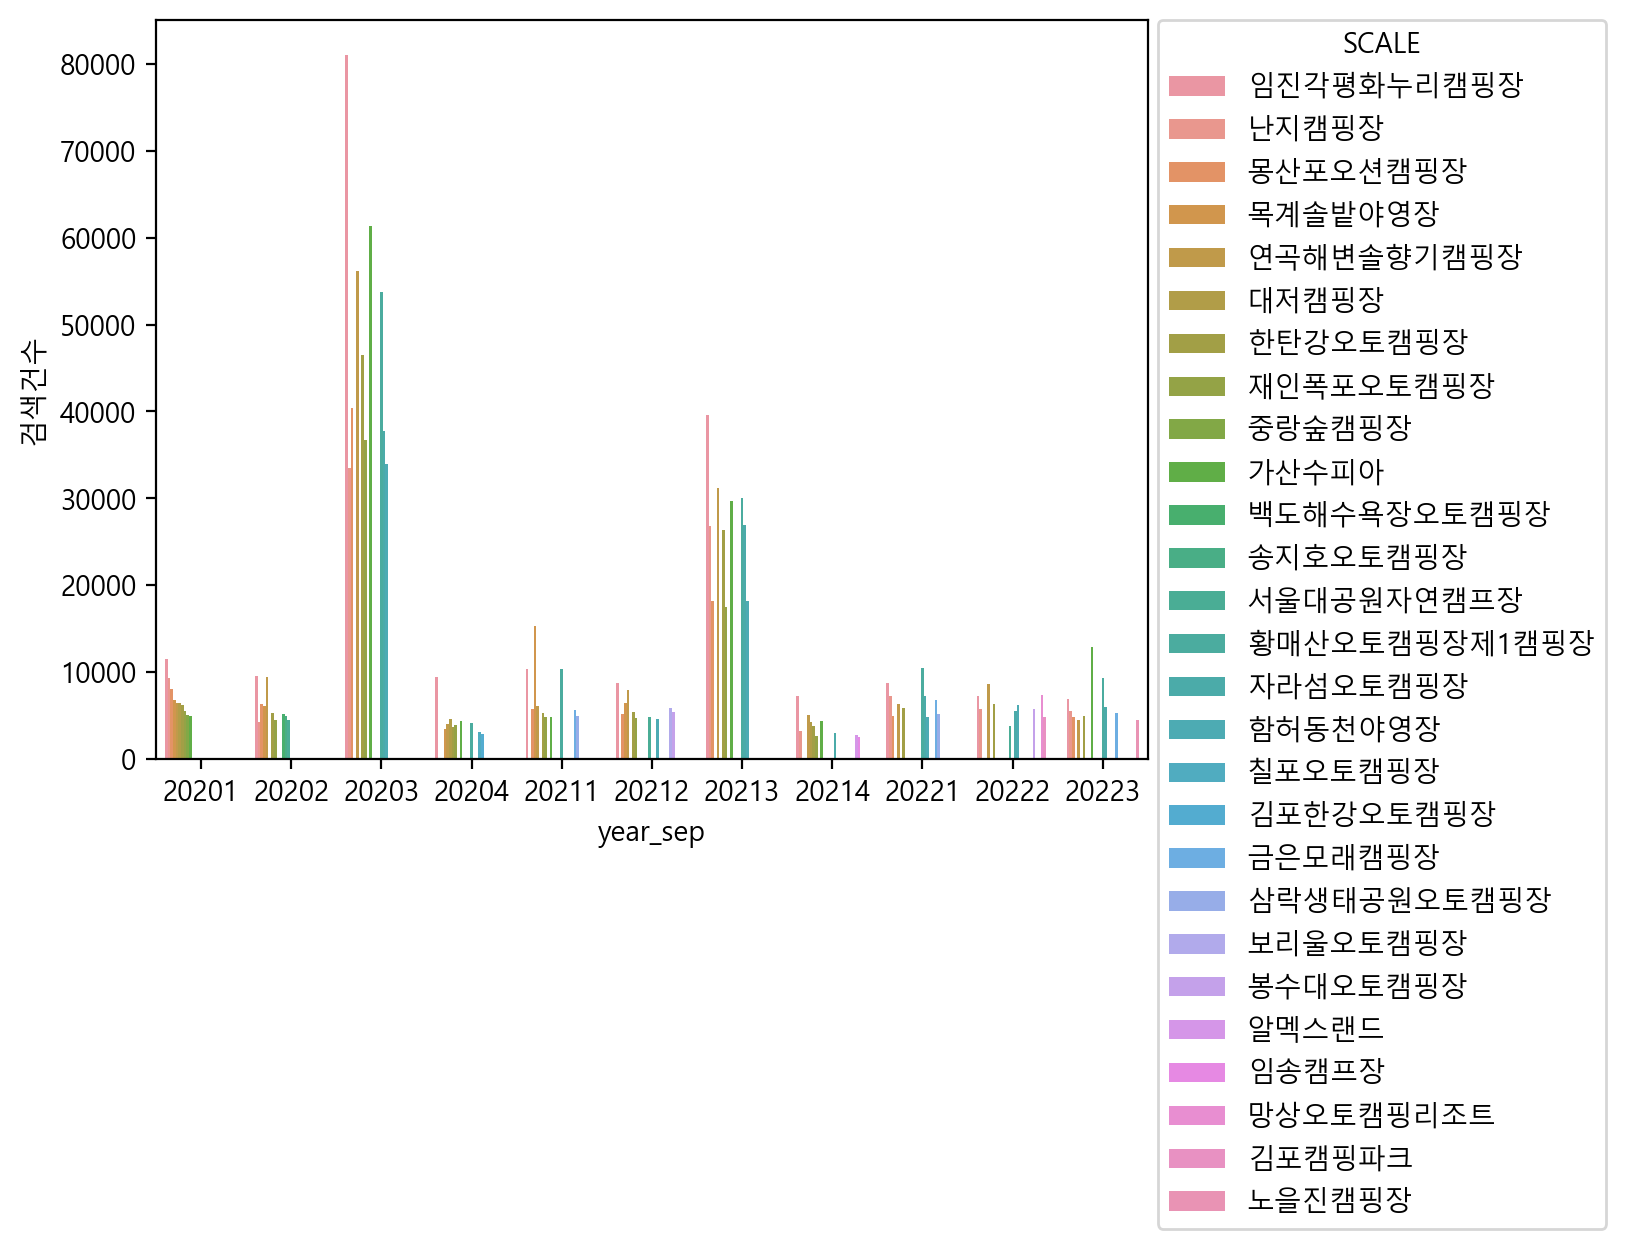

In [10]:
sns.barplot(data = cam_sep, x='year_sep',y='검색건수',hue='관광지명')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left',title= 'SCALE', borderaxespad=0)

In [11]:
cam_sep.head(3)

,관광지명,검색건수,year,sep,year_sep
69,임진각평화누리캠핑장,11549,2020,1,20201
11,난지캠핑장,9307,2020,1,20201
28,몽산포오션캠핑장,8053,2020,1,20201


In [16]:
c_1 = cam_sep[cam_sep['sep']=='1'].groupby('관광지명',as_index=False).agg(검색건수=('검색건수','sum'))
c_2 = cam_sep[cam_sep['sep']=='2'].groupby('관광지명',as_index=False).agg(검색건수=('검색건수','sum'))
c_3 = cam_sep[cam_sep['sep']=='3'].groupby('관광지명',as_index=False).agg(검색건수=('검색건수','sum'))
c_4 = cam_sep[cam_sep['sep']=='4'].groupby('관광지명',as_index=False).agg(검색건수=('검색건수','sum'))

In [21]:
ratio_total_1= list(c_1.loc[:,'검색건수'])
labels_total_1 = list(c_1.loc[:,'관광지명'])
ratio_total_2= list(c_2.loc[:,'검색건수'])
labels_total_2 = list(c_2.loc[:,'관광지명'])
ratio_total_3= list(c_3.loc[:,'검색건수'])
labels_total_3 = list(c_3.loc[:,'관광지명'])
ratio_total_4= list(c_4.loc[:,'검색건수'])
labels_total_4 = list(c_4.loc[:,'관광지명'])
# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels_total_1, values=ratio_total_1)])
fig.update_layout(margin=dict(t=20, b=20, l=10, r=20))
fig.show()
fig = go.Figure(data=[go.Pie(labels=labels_total_2, values=ratio_total_2)])
fig.update_layout(margin=dict(t=20, b=20, l=10, r=20))
fig.show()
fig = go.Figure(data=[go.Pie(labels=labels_total_3, values=ratio_total_3)])
fig.update_layout(margin=dict(t=20, b=20, l=10, r=20))
fig.show()
fig = go.Figure(data=[go.Pie(labels=labels_total_4, values=ratio_total_4)])
fig.update_layout(margin=dict(t=20, b=20, l=10, r=20))
fig.show()

In [26]:
df = pd.read_csv(r'C:\Users\kjk42\Documents\python\Done\data\전국 캠핑장 위치 및 부가정보.csv')

In [28]:
df_id = df[['CMPSI_NM','CMPSI_SCTIN_NM','CMPSI_LTTD_VAL','CMPSI_LNGTD_VAL']]
df_id

,CMPSI_NM,CMPSI_SCTIN_NM,CMPSI_LTTD_VAL,CMPSI_LNGTD_VAL
0,(주)데일리랜드,자동차야영장,37.758486,127.845655
1,(주)디노담양힐링파크 지점,"일반야영장,카라반,글램핑",35.271437,126.960953
2,(주)쉐르빌리안티티,글램핑,37.701565,127.596093
3,(주)아웃오브파크,카라반,37.727813,127.511257
4,(주)양촌여울체험캠프,"일반야영장,자동차야영장",35.136501,128.375301
...,...,...,...,...
2517,월등도 캠핑장,자동차야영장,34.973959,127.995753
2518,인천송도국제캠핑장,일반야영장,37.361597,126.645883
2519,가평 워크샵 캠핑장 씨브이,일반야영장,37.753107,127.535669
2520,제천카라반 더그린,"일반야영장,자동차야영장,카라반",37.143048,128.060448


In [ ]:
import folium
 
df_id_map = folium.Map(location=[36, 127], zoom_start=7)
 
for i in range(len(df_id)):
    folium.Marker(list(df_id.iloc[i][['CMPSI_LTTD_VAL', 'CMPSI_LNGTD_VAL']]),
                 popup=df_id.iloc[i][['CMPSI_NM']],
                 icon=folium.Icon(color='green')).add_to(df_id_map)

df_id_map

In [36]:
camping.head(3)

,관광지명,광역시/도,시/군/구,도로명주소,검색건수,date
0,함허동천야영장,인천광역시,강화군,인천 강화군 해안남로1196번길 38-0,1078,201911
1,황산문화체육공원국민여가캠핑장,경상남도,양산시,경남 양산시 낙동로 295-19,1079,201911
2,중랑숲캠핑장,서울특별시,중랑구,서울 중랑구 망우로87길 110-0,1086,201911


In [37]:
camp_sum = camping.groupby(['관광지명','도로명주소'],as_index=False).agg(검색건수=('검색건수','sum'))
camp_sum

,관광지명,도로명주소,검색건수
0,가래골캠핑장,경기 포천시 포천로2811번길 178-0,2640
1,가산수피아,경북 칠곡군 학하4길 57-105,74940
2,강나루오토캠핑장,경남 함안군,1144
3,강동그린웨이가족캠핑장,서울 강동구,2423
4,계방산오토캠핑장,강원 평창군 이승복생가길 160-0,1435
...,...,...,...
123,화양동야영장,충북 괴산군 화양로 733-38,472
124,황매산오토캠핑장제1캠핑장,경남 합천군 황매산공원길 331-0,60912
125,황산문화체육공원국민여가캠핑장,경남 양산시 낙동로 295-19,23833
126,휴리조트,경기 양주시 만송로366번길 215-29,8737


In [ ]:
# import googlemaps

# my_key =
# maps = googlemaps.Client(key=my_key)  # my key값 입력
# lat = []  #위도
# lng = []  #경도

# places = list(camp_sum['도로명주소'])

# for place in places:   
#     i = i + 1
#     try:
#         geo_location = maps.geocode(place)[0].get('geometry')
#         lat.append(geo_location['location']['lat'])
#         lng.append(geo_location['location']['lng'])
        

#     except:
#         lat.append('')
#         lng.append('')

# df = pd.DataFrame({'관광지명':places, 'lat':lat, 'lon':lng})
# df.to_csv('camp_location_1.csv')

In [39]:
loc = pd.read_csv(r'C:\Users\kjk42\Documents\python\Done\camp_location_1.csv')

In [42]:
loc = loc.drop(labels='Unnamed: 0',axis=1)
loc

,관광지명,lat,lon
0,경기 포천시 포천로2811번길 178-0,37.993553,127.157378
1,경북 칠곡군 학하4길 57-105,36.095306,128.485739
2,경남 함안군,35.272559,128.406480
3,서울 강동구,37.530125,127.123762
4,강원 평창군 이승복생가길 160-0,37.712629,128.480493
...,...,...,...
123,충북 괴산군 화양로 733-38,36.683324,127.806347
124,경남 합천군 황매산공원길 331-0,35.485037,127.997716
125,경남 양산시 낙동로 295-19,35.305996,128.983451
126,경기 양주시 만송로366번길 215-29,37.784568,127.099729


In [48]:
camp_loc = camp_sum.merge(loc,left_on='도로명주소',right_on='관광지명')
camp_loc = camp_loc.dropna()

In [ ]:
m = folium.Map(location=[36, 127], tiles="OpenStreetMap", zoom_start=7)

for i in range(0,len(camp_loc)):
   folium.Circle(
      location=[camp_loc.iloc[i]['lat'], camp_loc.iloc[i]['lon']],
      popup=camp_loc.iloc[i]['관광지명_x'],
      radius=float(camp_loc.iloc[i]['검색건수']),
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
m

In [ ]:
import folium
 
df_id_map = folium.Map(location=[36, 127], zoom_start=7)
 
for i in range(len(df_id)):
    folium.Marker(list(df_id.iloc[i][['CMPSI_LTTD_VAL', 'CMPSI_LNGTD_VAL']]),
                 popup=df_id.iloc[i][['CMPSI_NM']],
                 icon=folium.Icon(color='green')).add_to(df_id_map)

df_id_map

In [55]:
from folium import plugins

latitude, longitude = 35.9078, 127.7669 # 대한민국의 좌표
S_korea_all = folium.Map(location = [latitude, longitude], zoom_start = 8)

S_korea_all.add_child(plugins.HeatMap(zip(df_id['CMPSI_LTTD_VAL'],
                                      df_id['CMPSI_LNGTD_VAL']
                                      ), radius=18))
                                      
#오류
df_id['CMPSI_LTTD_VAL'] = df_id['CMPSI_LTTD_VAL'].astype('float')
df_id['CMPSI_LNGTD_VAL'] = df_id['CMPSI_LNGTD_VAL'].astype('float')

S_korea_all

In [53]:
from folium import plugins

latitude, longitude = 35.9078, 127.7669 # 대한민국의 좌표
S_korea_nev = folium.Map(location = [latitude, longitude], zoom_start = 8)

S_korea_nev.add_child(plugins.HeatMap(zip(camp_loc['lat'],
                                      camp_loc['lon'],
                                      camp_loc['검색건수']), radius=18))
                                      
#오류
camp_loc['lat'] = camp_loc['lat'].astype('float')
camp_loc['lon'] = camp_loc['lon'].astype('float')

S_korea_nev